In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.json to train.json


In [0]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LogisticRegression
import re
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

#from nltk.stem import WordNetLemmatizer
from nltk import PorterStemmer
from sklearn.utils import class_weight
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import pickle
import json
import numpy as np


def segregate(infile):
    with open(infile) as file:    
        data = json.load(file)
    cuisines = []
    ingredients = []
    if 'cuisine' in data[0].keys():
        for i in range(len(data)):
            cuisines.append(data[i]['cuisine'])
            ingredients.append(data[i]['ingredients'])
    else:
        for i in range(len(data)):
            ingredients.append(data[i]['ingredients'])                
    return cuisines, ingredients

def rem_extra_chars(doc):
    lemmatizer = PorterStemmer()
    for l_ings in doc:
        for i in l_ings:
            i.replace("-", " ")
            i.replace("&", " ")
            i.replace("!", " ")
            i.replace("'", " ")
            i.replace("%", " ")
            i.replace("(", " ")
            i.replace("?", " ")
            i.replace("(", " ")
            i.replace(")", " ")
            i.replace(":", " ")
            i.replace(",", " ")
            i.replace(".", " ")
            i.replace("/", " ")
            i.replace("$", " ")
            i.replace("@", " ")
            i.replace("#", " ")
            i.replace(u"\u2122", " ")
            i.replace(u"\u00AE", " ")
            #i = lemmatizer.stem(i)
    return doc

def to_lowercase(doc):
    for l_ings in doc:
        for i in l_ings:
            i = i.lower()
    return doc


def rem_numbers(doc):
    for l_ings in doc:
        for i in l_ings:
            i = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", i)
    return doc

def rem_extra_spaces(doc):
    for l_ings in doc:
        for i in l_ings:
            i = re.sub( '\s', ' ', i).strip()
    return doc


def uniq_counter(lst_of_lsts):
    temp = set()
    for i in lst_of_lsts:
        for j in i:
            temp.add(j)
    count = len(temp)
    return count

Y_train, X_train = segregate('my_train_split.json')
Y_test, X_test = segregate('my_test_split.json')
#print(X_train)
X_train = rem_extra_chars(X_train)
#print(X_train)
X_train = to_lowercase(X_train)
X_train = rem_numbers(X_train)
X_train = rem_extra_spaces(X_train)
X_test = rem_extra_chars(X_test)
X_test = to_lowercase(X_test)
X_test = rem_numbers(X_test)
X_test = rem_extra_spaces(X_test)


ingredients = set()
cuisines = set()


for r in Y_train:
    cuisines.add(r)
    
for i in X_train:
    for j in i:
        ingredients.add(j)


# assign ids to cuisines
cuisine_to_id = {}
id_to_cuisine = {}

counter = 0
for cuisine in cuisines:
    cuisine_to_id[cuisine] = counter
    id_to_cuisine[counter] = cuisine
    counter += 1
    
# assign ids to ingredients
ingredient_to_id = {}
id_to_ingredient = {}

counter = 0
for ingredient in ingredients:
    ingredient_to_id[ingredient] = counter
    id_to_ingredient[counter] = ingredient
    counter += 1

def create_supervised_one_hot(data, ytraining, create_y=False):
    no_of_recipes = 0
    num_samples = len(ytraining)
    num_ingredients = len(ingredients)
    num_cuisines =len(cuisines)
    X = np.zeros(shape=(num_samples, num_ingredients))
    if create_y:
        Y = np.zeros(shape=(num_samples, num_cuisines))
    for i, recipe in enumerate(data):
        for ingredient_in_this in recipe:
            if ingredient_in_this in ingredient_to_id:
                X[i, ingredient_to_id[ingredient_in_this]] = 1.0
        if create_y:
            Y[i, cuisine_to_id[ytraining[i]]] = 1.0
    if create_y:
        return X, Y
    else:
        return X
    
    
#Train and Test

X_train= create_supervised_one_hot(X_train, Y_train)
X_test = create_supervised_one_hot(X_test, Y_test)

italiancpy=[]
mexicancpy=[]
suscpy=[]
indiancpy=[]
frenchcpy=[]
chinesecpy=[]
thaicpy=[]
cajuccpy=[]
japanesecpy=[]
greekcpy=[]
spanishcpy=[]
koreancpy=[]
vietnamesecpy=[]
moroccancpy=[]
britishcpy=[]
filipinocpy=[]
irishcpy=[]
jamaicancpy=[]
russiancpy=[]
braziliancpy=[]


for i in range(0, len(Y_train)):
    if Y_train[i]=='italian':
        italiancpy.append(1)
    else:
        italiancpy.append(0)
    if Y_train[i]=='mexican':
        mexicancpy.append(1)
    else:
        mexicancpy.append(0)
    if Y_train[i]=='southern_us':
        suscpy.append(1)
    else:
        suscpy.append(0)
    if Y_train[i]=='indian':
        indiancpy.append(1)
    else:
        indiancpy.append(0)
    if Y_train[i]=='french':
        frenchcpy.append(1)
    else:
        frenchcpy.append(0)
    if Y_train[i]=='chinese':
        chinesecpy.append(1)
    else:
        chinesecpy.append(0)
    if Y_train[i]=='thai':
        thaicpy.append(1)
    else:
        thaicpy.append(0)
    if Y_train[i]=='cajun_creole':
        cajuccpy.append(1)
    else:
        cajuccpy.append(0)
    if Y_train[i]=='japanese':
        japanesecpy.append(1)
    else:
        japanesecpy.append(0)
    if Y_train[i]=='greek':
        greekcpy.append(1)
    else:
        greekcpy.append(0)
    if Y_train[i]=='spanish':
        spanishcpy.append(1)
    else:
        spanishcpy.append(0)
    if Y_train[i]=='korean':
        koreancpy.append(1)
    else:
        koreancpy.append(0)
    if Y_train[i]=='vietnamese':
        vietnamesecpy.append(1)
    else:
        vietnamesecpy.append(0)
    if Y_train[i]=='moroccan':
        moroccancpy.append(1)
    else:
        moroccancpy.append(0)
    if Y_train[i]=='british':
        britishcpy.append(1)
    else:
        britishcpy.append(0)
    if Y_train[i]=='filipino':
        filipinocpy.append(1)
    else:
        filipinocpy.append(0)
    if Y_train[i]=='irish':
        irishcpy.append(1)
    else:
        irishcpy.append(0)
    if Y_train[i]=='jamaican':
        jamaicancpy.append(1)
    else:
        jamaicancpy.append(0)
    if Y_train[i]=='russian':
        russiancpy.append(1)
    else:
        russiancpy.append(0)
    if Y_train[i]=='brazilian':
        braziliancpy.append(1)
    else:
        braziliancpy.append(0)


model_italian = LinearSVC(C=0.1)
model_sus = LinearSVC(C=0.1)
model_mexican = LinearSVC(C=0.1)
model_french = LinearSVC(C=0.1)
model_chinese = LinearSVC(C=0.1)
model_thai = LinearSVC(C=0.1)
model_cajuc = LinearSVC(C=0.1)
model_japanese =LinearSVC(C=0.1)
model_greek = LinearSVC(C=0.1)
model_spanish = LinearSVC(C=0.1)
model_korean = LinearSVC(C=0.1)
model_vietnamese=LinearSVC(C=0.1) 
model_moroccan =LinearSVC(C=0.1)
model_british = LinearSVC(C=0.1)
model_filipino =LinearSVC(C=0.1)
model_irish = LinearSVC(C=0.1)
model_jamaican =LinearSVC(C=0.1)
model_russian = LinearSVC(C=0.1)
model_brazilian =LinearSVC(C=0.1)
model_indian = LinearSVC(C=0.1)


#model_italian.fit(X_train, italiancpy)
#model_mexican.fit(X_train, mexicancpy)
#model_sus.fit(X_train, suscpy)
#model_french.fit(X_train, frenchcpy)
#model_chinese.fit(X_train, chinesecpy)
#model_thai.fit(X_train, thaicpy)
#model_cajuc.fit(X_train, cajuccpy)
#model_japanese.fit(X_train, japanesecpy)
#model_greek.fit(X_train, greekcpy)
#model_spanish.fit(X_train, spanishcpy)
#model_korean.fit(X_train, koreancpy)
#model_vietnamese.fit(X_train, vietnamesecpy)
#model_moroccan.fit(X_train, moroccancpy)
#model_british.fit(X_train, britishcpy)
#model_filipino.fit(X_train, filipinocpy)
#model_irish.fit(X_train, irishcpy)
#model_jamaican.fit(X_train, jamaicancpy)
#model_russian.fit(X_train, russiancpy)
#model_brazilian.fit(X_train, braziliancpy)
model_indian.fit(X_train, indiancpy)

#a1 = model_italian.predict(X_test)
#a2 = model_mexican.predict(X_test)
#a3 = model_sus.predict(X_test)
#a4 = model_french.predict(X_test)
#a5 = model_chinese.predict(X_test)
#a6 = model_thai.predict(X_test)
#a7 = model_cajuc.predict(X_test)
#a8 = model_japanese.predict(X_test)
#a9 = model_greek.predict(X_test)
#a10 = model_spanish.predict(X_test)
#a11 = model_korean.predict(X_test)
#a12 = model_vietnamese.predict(X_test)
#a13 = model_moroccan.predict(X_test)
#a14 = model_british.predict(X_test)
#a15 = model_filipino.predict(X_test)
#a16 = model_irish.predict(X_test)
#a17 = model_jamaican.predict(X_test)
#a18 = model_russian.predict(X_test)
#a19 = model_brazilian.predict(X_test)
a0 = model_indian.predict(X_test)

ytest_new = []
for k in range(0, len(Y_test)):
    if(Y_test[k]=='indian'):
        ytest_new+=[1]
    else:
        ytest_new+=[0]
        

score = accuracy_score(a0, ytest_new)
print(score)

0.9775393898759638


**Baseline Model - This model selects the most probable cuisine for every ingredient and then the most probale cusine for the recipe**

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss


cuisine_count = {}    # This dictionary is for ingredient --> cusines 

cuisine_top={}      # This dictionary is for classifying all the ingredients
                    # with respect to their cuisines i.e cuisine --> ingredients

cuisine_top_k = {}  # This dictionary selects top k ingredients from
                    # each cusine in cuisine_top dictionary


# This function trains on the training data and
# fills up the cuisine_count dict with each ingredient 
# corresponding to a set of cuisines in which they occur
def train_for_ing_to_cuisine(train_file):
    ings = set()
    with open(train_file) as file:
        data = json.load(file)
        for recipe in data:
            for ing in recipe['ingredients']:
                if ing not in ings:
                    ings.add(ing)
                    cuisine_count[ing] = {}
        for recipe in data:
            for ing in recipe['ingredients']:
                if recipe['cuisine'] not in cuisine_count[ing]:
                    cuisine_count[ing][recipe['cuisine']] = 1
                else:
                    cuisine_count[ing][recipe['cuisine']]+=1


# This function trains and fills up the
# cuisine_top dictionary
def train_for_cusine_to_ing(infile):
    with open(infile) as file:
        data = json.load(file)
        for recipe in data:
            if recipe['cuisine'] not in cuisine_top.keys():
                cuisine_top[recipe['cuisine']] = {}
            for ings in recipe['ingredients']:
                if ings in cuisine_top[recipe['cuisine']].keys():
                    cuisine_top[recipe['cuisine']][ings]+=1
                else:
                    cuisine_top[recipe['cuisine']][ings]=0


# This function is called when predecting we 
# come across an ingredient which is not in
# the top_k list of ingredients for a cuisine
# it selects the most common cusine for an ingredient from 
# the cuisne_count dict and appends it to the list
def most_used_cuisine_of_ingredient(ingredient):
    cuisdict = cuisine_count[ingredient]
    maxcuis = 0
    maxcuisine = ""
    for keys in cuisdict:
        if cuisdict[keys] > maxcuis:
            maxcuis = cuisdict[keys]
            maxcuisine = keys
    return maxcuisine

# This fucntion selects the top k ingredients
# and appends it to the cuisine_top_k dictionary
def top_k(k):
    for cuisines in cuisine_top:
        cuisine_top_k[cuisines] = []
        sorted_x = sorted(cuisine_top[cuisines].items(), key=lambda kv: kv[1], reverse=True)
        count=0
        for i in sorted_x:
            if count == k:
                break
            else:
                cuisine_top_k[cuisines].append(i[0])
            count+=1

# This function selects the most common 
# attribute from a list of attributes
def most_common(lst):
    return max(set(lst), key=lst.count)


# This function predicts the cuisine for each recipe
def predict(testfile):
    id = {}   # This dictionary stores most probable cuisine for each recipe
    with open(testfile) as file:
        data = json.load(file)
        for recipe in data:
            temp = []               # This list is used to append most probable cuisine for each ingredient in recipe
            for ing in recipe['ingredients']:
                present_state=False
                for i in cuisine_top_k:
                    if ing in cuisine_top_k[i]:
                        present_state=True
                        temp.append(i)
                if present_state==False: # This condition is satisfied whenever we come across an ingredient which is not in top_k
                    if ing in cuisine_count:
                        temp.append(most_used_cuisine_of_ingredient(ing))
            if len(temp) != 0:
                id[recipe['id']] = most_common(temp) # We select the most common cuisine from all the cuisines for ingredients
            else:
                id[recipe['id']] = 'none'
    return id

cuisines = set()
with open('train.json', 'r') as file:
    data = json.load(file)
    for this in data:
        cuisines.add(this['cuisine'])

def show_confusion_matrix(y_predicted, y_true, label_to_string_map=None):
    # labels, counts = np.unique(y_true, return_counts=True)
    labels = np.unique(list(cuisines))
    map_label_to_index = { label : i for i, label in enumerate(labels) }
    
    # compute confusion matrix
    confusion_matrix = np.zeros((labels.shape[0], labels.shape[0]), dtype=int)
    for prediction_label, true_label in zip(y_predicted, y_true):
        confusion_matrix[map_label_to_index[true_label], map_label_to_index[prediction_label]] += 1
    
    # plot confusion matrix
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    fig.suptitle('Confusion matrix', fontsize=20)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    labels_yaxes = [ '{}'.format(label) for label in labels ]
    labels_xaxes = [ '{}'.format(label) for label in labels ]
    ax.set_xticklabels([''] + labels_xaxes)
    ax.set_yticklabels([''] + labels_yaxes)
    im = ax.matshow(confusion_matrix, cmap='coolwarm')
    # attribution for following two lines: https://stackoverflow.com/questions/20998083/show-the-values-in-the-grid-using-matplotlib
    for (i, j), z in np.ndenumerate(confusion_matrix):
        ax.text(j, i, '{}'.format(z), ha='center', va='center')
    fig.colorbar(im)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.tick_params(axis='x', labelrotation=60)
    plt.show()


# This function is just to predict the accuracy of the model
# by checking cuisines for each recipe from the test_split.json file

def validate(val_file, y_pred, y_true, orig_cuis_from_id):
    count = 0
    total_count=0
    predicted_val = predict(val_file)
    org_cuis = {}
    with open(val_file) as file:
        data = json.load(file)   
        for ids in data:
            total_count+=1
            y_pred+=[predicted_val[ids['id']]]
            y_true+=[ids['cuisine']]
            org_cuis[ids['id']] = ids['cuisine']
            if predicted_val[ids['id']] != ids['cuisine']:
                count+=1
    for ids_from_pred in predicted_val:
        orig_cuis_from_id+=[org_cuis[ids_from_pred]]
    return (1-count/total_count)

def print_f1_scores(orig_cuis_from_id, y_predicted):
    labels = np.unique(orig_cuis_from_id)
    f1_scores = f1_score(orig_cuis_from_id, y_predicted, labels=labels, average=None)
    print('2. f1_scores for each class:\n')
    for i, label in enumerate(labels):
        print('{:>20}:\t{:.4f}'.format(label, f1_scores[i]))
    print('\n')
    print('3. avg f1_score (without considering class imbalance): {}\n'.format(f1_score(orig_cuis_from_id, y_predicted, average='macro')))
    print('4. avg f1_score (weighted by considering class imbalance): {}\n'.format(f1_score(orig_cuis_from_id, y_predicted, average='weighted')))



Accuracy: 
65.49614482065036


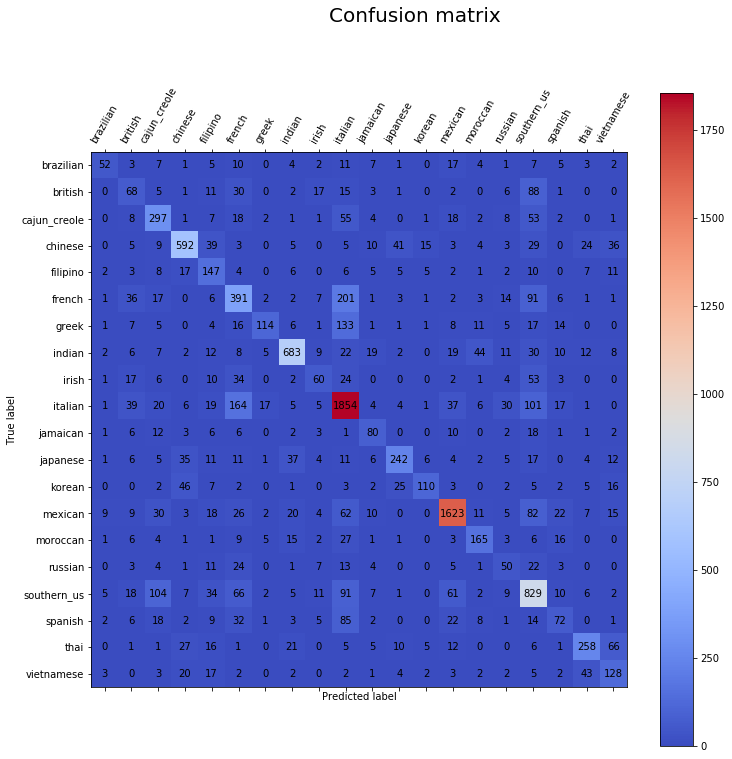

2. f1_scores for each class:

           brazilian:	0.4643
             british:	0.2736
        cajun_creole:	0.5695
             chinese:	0.7456
            filipino:	0.4659
              french:	0.4760
               greek:	0.4597
              indian:	0.7878
               irish:	0.3380
             italian:	0.7480
            jamaican:	0.4908
            japanese:	0.6360
              korean:	0.5820
             mexican:	0.8511
            moroccan:	0.6191
             russian:	0.3205
         southern_us:	0.6023
             spanish:	0.3064
                thai:	0.6394
          vietnamese:	0.4723


3. avg f1_score (without considering class imbalance): 0.5424165998145429

4. avg f1_score (weighted by considering class imbalance): 0.65370064328374

None


In [0]:
# Now we train all functions on train split and set k=50 for optimal performance

train_for_cusine_to_ing('my_train_split.json')
train_for_ing_to_cuisine('my_train_split.json')
top_k(50)
y_pred=[]
y_true=[]
org_cuis_from_id = []
percentage = validate('my_test_split.json', y_pred, y_true, org_cuis_from_id)
print("Accuracy: ")
print(percentage*100)
show_confusion_matrix(y_pred, y_true)
print(print_f1_scores(org_cuis_from_id, y_pred))

**ML model #1 - Naive undersampling. We found out that the data is heavily imbalanced, most of the recipes belonged to italian or mexican cuisine, so we tried to reduce the number of recipes by limiting the max no. of recipes in each cuisine to be number_of_recipes/num_cuisines. This does not have a very significant impact either on accuracy or on f1_scores.**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

ingredients = set()
cuisines = set()

with open('train.json') as file:
    data = json.load(file)
    for r in data:
        cuisines.add(r['cuisine'])
        for i in r['ingredients']:
            ingredients.add(i)

# assign ids to cuisines
cuisine_to_id = {}
id_to_cuisine = {}
counter = 0
for cuisine in cuisines:
    cuisine_to_id[cuisine] = counter
    id_to_cuisine[counter] = cuisine
    counter += 1
    
# assign ids to ingredients
ingredient_to_id = {}
id_to_ingredient = {}


counter = 0
for ingredient in ingredients:
    ingredient_to_id[ingredient] = counter
    id_to_ingredient[counter] = ingredient
    counter += 1


def inverse_one_hot(Y):
    y = np.zeros(shape=(Y.shape[0], ))
    for i in range(Y.shape[0]):
        y[i] = np.argmax(Y[i, :])
    return y


def one_hot_to_cuis(y_change, y_unchange):
    for i in y_unchange:
        y_change+=[id_to_cuisine[i]]

def create_supervised_one_hot(infile):
    with open(infile, 'r') as file:
        data = json.load(file)
        num_samples = len(data)
        num_ingredients =  len(ingredients)
        num_cuisines = len(cuisines)
        max_in_one_cuisine = int(num_samples/num_cuisines)
        checker = []
        for i in range(0,num_cuisines):
            checker+=[0]
        X = []
        Y = []
        for i, recipe in enumerate(data):
            if checker[cuisine_to_id[recipe['cuisine']]] <= max_in_one_cuisine:
                checker[cuisine_to_id[recipe['cuisine']]]+=1
                temp = []
                for abc in range(0,num_ingredients):
                    temp+=[0]
                for ingredient_in_this in recipe['ingredients']:
                    if ingredient_in_this in ingredient_to_id:
                        temp[ingredient_to_id[ingredient_in_this]] = 1
                X+=[temp]
                temp2=[]
                for abcd in range(0,num_cuisines):
                    temp2+=[0]
                temp2[cuisine_to_id[recipe['cuisine']]] = 1
                Y+=[temp2]
        X = np.array(X)
        Y = np.array(Y)
        return X, Y
 



Accuracy: 
73.57805566760791


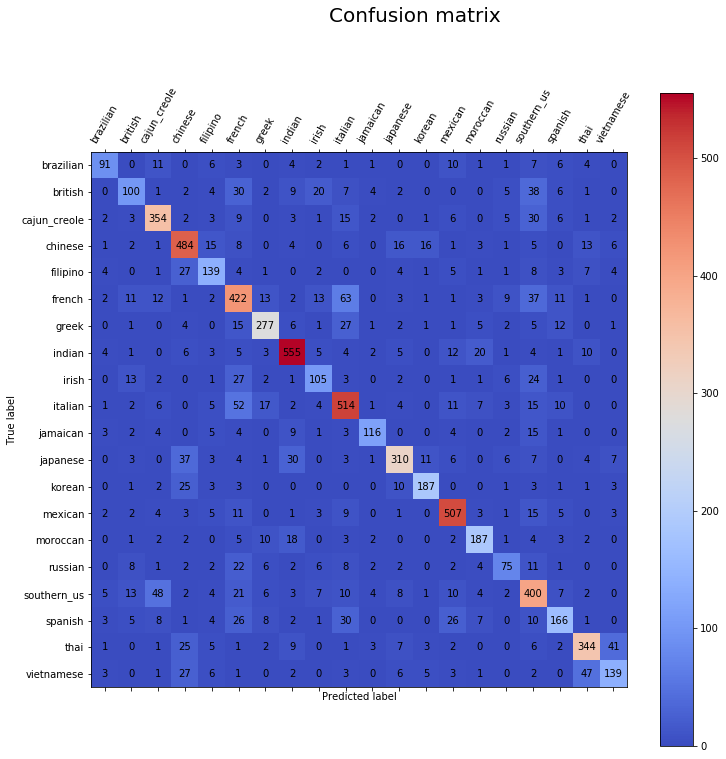

2. f1_scores for each class:

           brazilian:	0.6741
             british:	0.5013
        cajun_creole:	0.7832
             chinese:	0.7857
            filipino:	0.6511
              french:	0.6594
               greek:	0.7814
              indian:	0.8519
               irish:	0.5833
             italian:	0.7537
            jamaican:	0.7532
            japanese:	0.7607
              korean:	0.8009
             mexican:	0.8557
            moroccan:	0.7648
             russian:	0.5435
         southern_us:	0.6650
             spanish:	0.6148
                thai:	0.7722
          vietnamese:	0.6150


3. avg f1_score (without considering class imbalance): 0.7085393584509719

4. avg f1_score (weighted by considering class imbalance): 0.7335387524665602



In [0]:
# create X, Y matrices
X, Y = create_supervised_one_hot('train.json')

#Split dataset for train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

#For Sklearn models we have to inverse encode
Y_train = inverse_one_hot(Y_train)
Y_test = inverse_one_hot(Y_test)

y_pred = []
y_true = []
#print(X_train,Y_test)

#Train and predict
model = LinearSVC(C=0.1)
model.fit(X_train, Y_train)
ans = model.predict(X_test)
acc = accuracy_score(Y_test, ans)

print("Accuracy: ")
print(acc*100)
#converting onehot back to its original form
one_hot_to_cuis(y_pred, ans)
one_hot_to_cuis(y_true, Y_test)
show_confusion_matrix(y_pred, y_true)
print_f1_scores(y_true, y_pred)


**ML model #2 - One-hot-encoded dataset with SVM. The data is on-hot-encoded and then passed to a linearSVC model. The hyperparameter of LinearSVC was chosen by using GridSearchCV. A smaller value of C acheived a higher accuracy in our case** 

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier
import json
import numpy as np

ingredients = set()
cuisines = set()

with open('train.json') as file:
    data = json.load(file)
    for r in data:
        cuisines.add(r['cuisine'])
        for i in r['ingredients']:
            ingredients.add(i)

# assign ids to cuisines
cuisine_to_id = {}
id_to_cuisine = {}
counter = 0
for cuisine in cuisines:
    cuisine_to_id[cuisine] = counter
    id_to_cuisine[counter] = cuisine
    counter += 1
    
# assign ids to ingredients
ingredient_to_id = {}
id_to_ingredient = {}

counter = 0
for ingredient in ingredients:
    ingredient_to_id[ingredient] = counter
    id_to_ingredient[counter] = ingredient
    counter += 1

def create_supervised_one_hot(infile, create_y=True):
    with open(infile, 'r') as file:
        data = json.load(file)
        num_samples = len(data)
        num_ingredients =  len(ingredients)
        num_cuisines = len(cuisines)
        X = np.zeros(shape=(num_samples, num_ingredients))
        if create_y:
            Y = np.zeros(shape=(num_samples, num_cuisines))
        for i, recipe in enumerate(data):
            for ingredient_in_this in recipe['ingredients']:
                if ingredient_in_this in ingredient_to_id:
                    #print(ingredient_in_this)
                    X[i, ingredient_to_id[ingredient_in_this]] = 1.0
            if create_y:
                Y[i, cuisine_to_id[recipe['cuisine']]] = 1.0
        if create_y:
            return X, Y
        else:
            return X

def one_hot_to_cuis(y_change, y_unchange):
    for i in y_unchange:
        y_change+=[id_to_cuisine[i]]

def inverse_one_hot(Y):
    y = np.zeros(shape=(Y.shape[0], ))
    for i in range(Y.shape[0]):
        y[i] = np.argmax(Y[i, :])
    return y

Accuracy: 
78.19492164585603




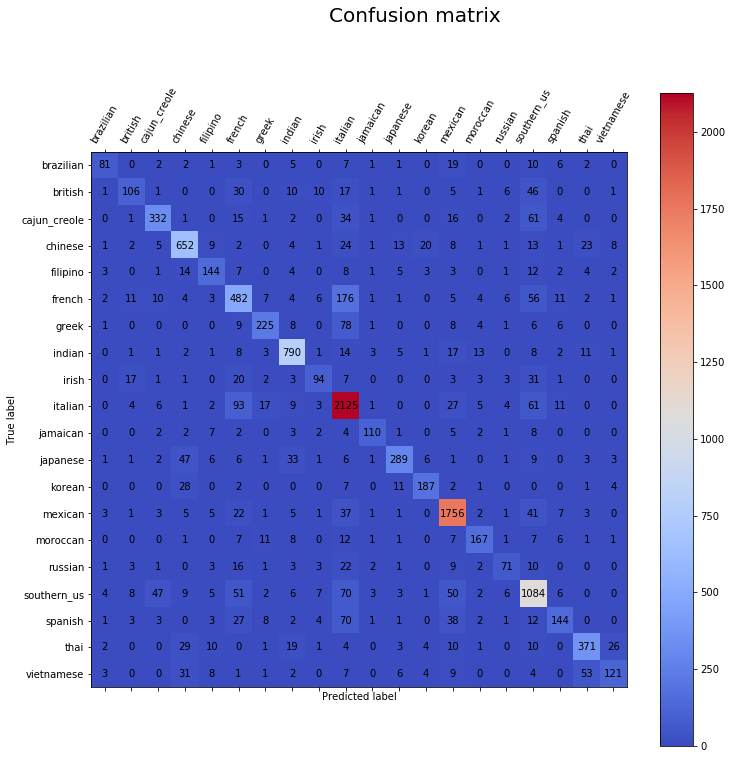

2. f1_scores for each class:

           brazilian:	0.6639
             british:	0.5381
        cajun_creole:	0.7486
             chinese:	0.8059
            filipino:	0.6841
              french:	0.6044
               greek:	0.7166
              indian:	0.8768
               irish:	0.5875
             italian:	0.8337
            jamaican:	0.7885
            japanese:	0.7605
              korean:	0.7974
             mexican:	0.9021
            moroccan:	0.7574
             russian:	0.5591
         southern_us:	0.7599
             spanish:	0.5465
                thai:	0.7689
          vietnamese:	0.5789


3. avg f1_score (without considering class imbalance): 0.7139416830806286

4. avg f1_score (weighted by considering class imbalance): 0.7766885960334513



In [0]:
# create X, Y matrices and split to create test and train data
X, Y = create_supervised_one_hot('train.json')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

Y_train = inverse_one_hot(Y_train)
Y_test = inverse_one_hot(Y_test)

#Train and predict
ada = LinearSVC(C=0.1)
ada.fit(X_train, Y_train)
ans = ada.predict(X_test)
dec_acc = accuracy_score(ans, Y_test)


y_pred = []
y_true = []

one_hot_to_cuis(y_pred, ans)
one_hot_to_cuis(y_true, Y_test)
print("Accuracy: ")
print(dec_acc*100)
print("\n")
show_confusion_matrix(y_pred, y_true)
print_f1_scores(y_true, y_pred)

**ML model #2b - One vs Rest classifier compares each class with every other class and then chooses the best fit. LinearSVC when combined with one-vs-rest classifier acheived a score slightly higher than the previous one**

Accuracy: 
78.51336629514792




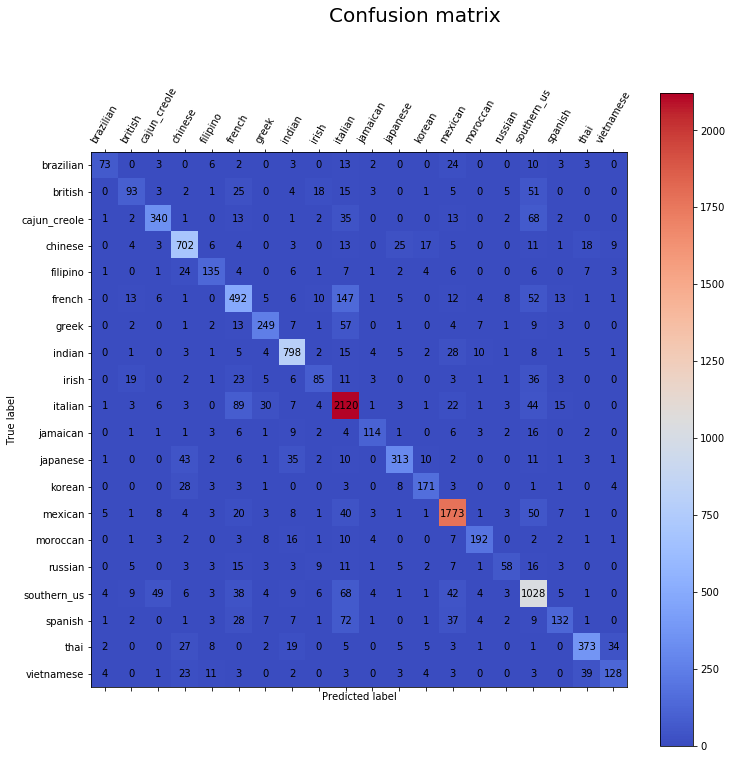

2. f1_scores for each class:

           brazilian:	0.6213
             british:	0.4869
        cajun_creole:	0.7522
             chinese:	0.8269
            filipino:	0.6767
              french:	0.6272
               greek:	0.7324
              indian:	0.8660
               irish:	0.4942
             italian:	0.8460
            jamaican:	0.7261
            japanese:	0.7643
              korean:	0.7668
             mexican:	0.9005
            moroccan:	0.7967
             russian:	0.4957
         southern_us:	0.7567
             spanish:	0.5269
                thai:	0.7936
          vietnamese:	0.6259


3. avg f1_score (without considering class imbalance): 0.7041462264571111

4. avg f1_score (weighted by considering class imbalance): 0.7795403353025687



In [0]:
another_classifer = LinearSVC(C=0.1)
on_v_rest = OneVsRestClassifier(another_classifer)
on_v_rest.fit(X_train, Y_train)
y_pred_OVR = on_v_rest.predict(X_test)
acc_for_OVR = accuracy_score(Y_test, y_pred_OVR)
y_pred = []
y_true = []
one_hot_to_cuis(y_pred, y_pred_OVR)
one_hot_to_cuis(y_true, Y_test)
print("Accuracy: ")
print(acc_for_OVR*100)
print("\n")
show_confusion_matrix(y_pred, y_true)
print_f1_scores(y_true, y_pred)


**ML model #3 - Preprocessing of data by removing additional logos, symbols, numbers, lowering the case. This method was used in a research paper but as in the research paper it does not show any significant improvement in accuracy metrics.**

In [0]:
%matplotlib inline
import keras
import nltk
nltk.download('wordnet')
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LogisticRegression
import re
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from nltk.stem import WordNetLemmatizer
from sklearn.utils import class_weight
import json
import numpy as np


def segregate(infile):
    with open(infile) as file:    
        data = json.load(file)
    cuisines = []
    ingredients = []
    if 'cuisine' in data[0].keys():
        for i in range(len(data)):
            cuisines.append(data[i]['cuisine'])
            ingredients.append(data[i]['ingredients'])
    else:
        for i in range(len(data)):
            ingredients.append(data[i]['ingredients'])                
    return cuisines, ingredients

def rem_extra_chars(doc):
    lemmatizer = WordNetLemmatizer()
    for l_ings in doc:
        for i in l_ings:
            #i.replace("-", " ")
            #i.replace("&", " ")
            #i.replace("!", " ")
            #i.replace("'", " ")
            #i.replace("%", " ")
            #i.replace("(", " ")
            #i.replace("?", " ")
            #i.replace("(", " ")
            #i.replace(")", " ")
            #i.replace(":", " ")
            #i.replace(",", " ")
            #i.replace(".", " ")
            #i.replace("/", " ")
            #i.replace("$", " ")
            #i.replace("@", " ")
            #i.replace("#", " ")
            #i.replace(u"\u2122", " ")
            #i.replace(u"\u00AE", " ")
            i.replace(i, lemmatizer.lemmatize(i, pos="a"))
    return doc

def to_lowercase(doc):
    for l_ings in doc:
        for i in l_ings:
            i = i.lower()
    return doc


def rem_numbers(doc):
    for l_ings in doc:
        for i in l_ings:
            i = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", i)
    return doc

def rem_extra_spaces(doc):
    for l_ings in doc:
        for i in l_ings:
            i = re.sub( '\s', ' ', i).strip()
    return doc


def uniq_counter(lst_of_lsts):
    temp = set()
    for i in lst_of_lsts:
        for j in i:
            temp.add(j)
    count = len(temp)
    return count

Y_train, X_train = segregate('my_train_split.json')
Y_test, X_test = segregate('my_test_split.json')
#print(X_train)
X_train = rem_extra_chars(X_train)
print(X_train)
X_train = to_lowercase(X_train)
X_train = rem_numbers(X_train)
X_train = rem_extra_spaces(X_train)
X_test = rem_extra_chars(X_test)
X_test = to_lowercase(X_test)
X_test = rem_numbers(X_test)
X_test = rem_extra_spaces(X_test)

ingredients = set()
cuisines = set()


for r in Y_train:
    cuisines.add(r)
    
for i in X_train:
    for j in i:
        ingredients.add(j)


# assign ids to cuisines
cuisine_to_id = {}
id_to_cuisine = {}

counter = 0
for cuisine in cuisines:
    cuisine_to_id[cuisine] = counter
    id_to_cuisine[counter] = cuisine
    counter += 1
    
# assign ids to ingredients
ingredient_to_id = {}
id_to_ingredient = {}

counter = 0
for ingredient in ingredients:
    ingredient_to_id[ingredient] = counter
    id_to_ingredient[counter] = ingredient
    counter += 1

def create_supervised_one_hot(data, ytraining, create_y=False):
    no_of_recipes = 0
    num_samples = len(ytraining)
    num_ingredients = len(ingredients)
    num_cuisines =len(cuisines)
    X = np.zeros(shape=(num_samples, num_ingredients))
    if create_y:
        Y = np.zeros(shape=(num_samples, num_cuisines))
    for i, recipe in enumerate(data):
        for ingredient_in_this in recipe:
            if ingredient_in_this in ingredient_to_id:
                X[i, ingredient_to_id[ingredient_in_this]] = 1.0
        if create_y:
            Y[i, cuisine_to_id[ytraining[i]]] = 1.0
    if create_y:
        return X, Y
    else:
        return X
    
    
#Train and Test

X_train= create_supervised_one_hot(X_train, Y_train)
X_test = create_supervised_one_hot(X_test, Y_test)
#print(X_train.shape)
labelEncode = LabelEncoder()
Y_test = labelEncode.fit_transform(Y_test)
Y_train = labelEncode.fit_transform(Y_train)

model = LinearSVC(C=0.1)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
score = accuracy_score(Y_test, Y_pred)
print(score*100)
y_true = labelEncode.inverse_transform(Y_test)
y_pred = labelEncode.inverse_transform(Y_pred)
#show_confusion_matrix(y_pred, y_true)
#print_f1_scores(y_true, y_pred)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



78.06738183037211


**ML model #4 - Using text based methods- The feauture extraction library of sklearn provides some very useful text based feature extraction methods. CountVectorizer() tokenizes the words occuring in each document by the number of times it appears. The ingredients of every recipe are joined together in one sentence and are used to form a corpus of documents. Since the number of parameters are less than one-hot-encoded dataset, computationally expensive methods like SVM with rbf kernel or XgBOOST can also be used easily. Here I have included the one which performs the best. Hypere-parameters were chosen by trial-and-error method.**

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import json
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import SGD
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from nltk.stem import WordNetLemmatizer
import re
import xgboost as xgb

cuisines = set()

def join_all_ings(infile, joined_ings_lst):
    with open(infile) as file:
        data = json.load(file)
        stemmer = WordNetLemmatizer()
        for recipe in data:
            temp = ""
            for i in recipe['ingredients']:
                i=i.replace("-", "")
                i=i.replace("&", "")
                i=i.replace("!", "")
                i=i.replace("'", "")
                i=i.replace("%", "")
                i=i.replace("(", "")
                i=i.replace("?", "")
                i=i.replace("(", "")
                i=i.replace(")", "")
                i=i.replace(":", "")
                i=i.replace(",", "")
                i=i.replace(".", "")
                i=i.replace("/", "")
                i=i.replace("$", "")
                i=i.replace("@", "")
                i=i.replace("#", "")
                i=i.replace(u"\u2122", "")
                i=i.replace(u"\u00AE", "")
                i = re.sub("^\d+\s|\s\d+\s|\s\d+$", "", i)
                i=stemmer.lemmatize(i, pos="a")
                temp+=i
                temp+=" "
            temp = temp.strip()
            joined_ings_lst+=[" ".join(temp.split())]
    return joined_ings_lst


def train_cuis(infile, cuis_lst):
    with open(infile) as file:
        data = json.load(file)
        for recipe in data:
            cuis_lst+=[recipe['cuisine']]
            cuisines.add(recipe['cuisine'])
    return cuis_lst

def create_one_hot_y(ytraining):
    num_cuisines = 20
    Y = np.zeros(shape=(ytraining.shape[0], 20))
    #X = np.zeros(shape=(num_samples, num_ingredients))
    for i in range(0,ytraining.shape[0]):
        Y[i, ytraining[i]] = 1.0
    return Y

encoder = CountVectorizer()

X_train = join_all_ings('my_train_split.json', [])
encoder.fit(X_train)
X_train = encoder.transform(X_train)
Y_train = train_cuis('my_train_split.json', [])
labelsEncode = LabelEncoder()
labelsEncode.fit(Y_train)
Y_train = labelsEncode.transform(Y_train)
X_test = join_all_ings('my_test_split.json', [])
X_test = encoder.transform(X_test)
Y_test = train_cuis('my_test_split.json', [])
Y_test = labelsEncode.transform(Y_test)

#For comparision between one-hot-enc and countVec enc
print(X_train.shape)
#The total features which the encoder has encoded
print(encoder.vocabulary_)

(27842, 2845)
{'field': 903, 'lettuce': 1445, 'extravirgin': 871, 'olive': 1761, 'oil': 1752, 'seedless': 2274, 'cucumber': 698, 'fresh': 978, 'mozzarella': 1662, 'lemon': 1435, 'juice': 1312, 'basil': 143, 'leaves': 1426, 'grated': 1109, 'zest': 2839, 'water': 2760, 'farro': 882, 'green': 1123, 'bell': 171, 'pepper': 1884, 'dried': 803, 'thyme': 2600, 'tomatoes': 2620, 'with': 2799, 'cayenne': 441, 'soy': 2409, 'sauce': 2240, 'bacon': 111, 'garlic': 1024, 'onions': 1767, 'cooked': 616, 'ham': 1166, 'ground': 1137, 'black': 210, 'white': 2781, 'rice': 2134, 'medium': 1578, 'shrimp': 2335, 'chicken': 486, 'stock': 2476, 'chorizo': 531, 'paprika': 1828, 'allpurpose': 34, 'flour': 948, 'boneless': 242, 'skinless': 2355, 'breast': 283, 'halves': 1165, 'hazelnuts': 1187, 'unsalted': 2698, 'butter': 329, 'warm': 2757, 'instant': 1269, 'espresso': 860, 'powder': 2009, 'cream': 656, 'of': 1749, 'tartar': 2556, 'large': 1414, 'egg': 835, 'whites': 2783, 'corn': 624, 'starch': 2456, 'sugar': 250

**As seen above the vocabulary of words that the CountVectorizer has tokenized. In comparision to one hot encoding there are only 2797 features per recipe compared to 6714 in one-hot**

In [0]:
model = LinearSVC(C=0.1)
model.fit(X_train, Y_train)

prediction = model.predict(X_test)
y_pred= labelsEncode.inverse_transform(prediction)
y_true = labelsEncode.inverse_transform(Y_test)

acc = accuracy_score(Y_test, prediction)
print("Accuracy: ")
print(acc*100)

#show_confusion_matrix(y_pred, y_true)
#print_f1_scores(y_true, y_pred)

Accuracy: 
78.37747234327857


**ML Model #4b - The Tfidf method is even better in terms of accuracy. TF-IDF basically calulates the term frequency of each word in a doucment and multiplies it with the IDF ("inverse document frequency") score to get the TFIDF score. This method performs the best due to its selection of most important words from the document(It does not consider frequently occuring terms due to low tfidf score). This leads to an even better classification accuracy. Although the accuracy with XGBoost and neural network was almost similar, I have included only one of the methods i.e SVM with rbf kernel. Again, the hyper-parameters were chosen by trial and error method. This method was used in most of the research papers I read regarding cuisine classification ** **bold text**

In [0]:
encoder = TfidfVectorizer()

X_train = join_all_ings('my_train_split.json', [])
encoder.fit(X_train)
X_train = encoder.transform(X_train)
Y_train = train_cuis('my_train_split.json', [])
labelsEncode = LabelEncoder()
labelsEncode.fit(Y_train)
Y_train = labelsEncode.transform(Y_train)
X_test = join_all_ings('my_test_split.json', [])
X_test = encoder.transform(X_test)
Y_test = train_cuis('my_test_split.json', [])
Y_test = labelsEncode.transform(Y_test)
print(encoder.get_feature_names())
print("\n")
print("Number of ingredients after feature extraction: ")
print(len(encoder.get_feature_names()))

['12', 'abalone', 'abbamele', 'absinthe', 'abura', 'acai', 'accent', 'achiote', 'acid', 'acini', 'ackee', 'acorn', 'active', 'added', 'adobo', 'adzuki', 'agar', 'agave', 'age', 'aged', 'ahi', 'aioli', 'ajinomoto', 'ajwain', 'aka', 'alaskan', 'albacore', 'alcohol', 'ale', 'aleppo', 'alexia', 'alfalfa', 'alfredo', 'all', 'allpurpose', 'allspice', 'almond', 'almondmilk', 'almonds', 'alphabet', 'alum', 'amaranth', 'amaretti', 'amaretto', 'amba', 'amber', 'amberjack', 'amchur', 'america', 'american', 'aminos', 'ammonium', 'ampalaya', 'anaheim', 'anasazi', 'ancho', 'anchovies', 'anchovy', 'and', 'andouille', 'anejo', 'angel', 'anglaise', 'angostura', 'angus', 'anise', 'anisette', 'anjou', 'annatto', 'any', 'apple', 'apples', 'applesauce', 'applewood', 'apricot', 'apricots', 'arbol', 'arborio', 'arepa', 'arhar', 'armagnac', 'arrabbiata', 'arrow', 'arrowroot', 'artichok', 'artichoke', 'artichokes', 'artisan', 'arugula', 'asada', 'asadero', 'asafetida', 'asafoetida', 'asiago', 'asian', 'asparag

**The number of features are far less when compared to one-hot-encoding where there were 6714 columns**

In [0]:
model = SVC(C=10,gamma=1)
model.fit(X_train, Y_train)

prediction = model.predict(X_test)
y_pred= labelsEncode.inverse_transform(prediction)
y_true = labelsEncode.inverse_transform(Y_test)

acc = accuracy_score(Y_test, prediction)
print("Accuracy: ")
print(acc*100)

#show_confusion_matrix(y_pred, y_true)
#print_f1_scores(y_true, y_pred)

Accuracy: 
80.35534696614147


**NN with word2vec embeddings**

In [6]:
import nltk
import json
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from nltk.stem import WordNetLemmatizer
import re
from gensim.models import Word2Vec

Y_train=[]
with open('train.json') as file:
    data = json.load(file)
    lst_of_recipes=[]
    for recipe in data:
        Y_train.append(recipe['cuisine'])
        temp=[]
        for ings in recipe['ingredients']:
            temp.append(ings)
        lst_of_recipes.append(temp)

dimensionality = 300
model = Word2Vec(lst_of_recipes, size=dimensionality, min_count=3)

ingredients = set()
cuisines = set()

for r in Y_train:
    cuisines.add(r)

# assign ids to cuisines
cuisine_to_id = {}
id_to_cuisine = {}

counter = 0
for cuisine in cuisines:
    cuisine_to_id[cuisine] = counter
    id_to_cuisine[counter] = cuisine
    counter += 1
    

def create_embedding(infile):
    with open(infile, 'r') as file:
        data = json.load(file)
    num_recipes = len(data)
    embedding_dim=dimensionality
    X = np.zeros(shape=(num_recipes, embedding_dim))
    Y = np.zeros(shape=(num_recipes, 20))
    for i, recipe in enumerate(data):
        embedding_for_recipe = []
        Y[i, cuisine_to_id[recipe['cuisine']]] = 1.0
        for ing in recipe['ingredients']:    
            try:
                embedding_for_recipe.append(model[ing])
            except KeyError:
                print( "not found! ",  ing)
                
        #print(embedding_for_recipe)
        X[i,:] = np.mean(embedding_for_recipe, axis=0)
    return X,Y



X_embedding, Y_embedding = create_embedding('train.json')

X_embedding_train, X_embedding_test, Y_embedding_train, Y_embedding_test = train_test_split(X_embedding, Y_embedding, test_size=0.3, shuffle=True)

print(X_embedding_train.shape, X_embedding_test.shape, Y_embedding_train.shape)

def train(X_train, Y_train, X_validation, Y_validation):

        model = Sequential()
        model.add(Dense(200, activation='relu', input_dim=X_train.shape[1]))
        model.add(Dropout(0.2))
        model.add(Dense(70, activation='relu'))
        model.add(Dropout(0.1))
        model.add(Dense(Y_train.shape[1], activation='softmax'))
        sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy',
                      optimizer=sgd,
                      metrics=['accuracy'])
    
        history = model.fit(X_train, Y_train, epochs=1000, batch_size=128, verbose=1, validation_data=(X_validation, Y_validation))

train(X_embedding_train, Y_embedding_train, X_embedding_test, Y_embedding_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


not found!  white almond bark
not found!  Johnsonville Andouille Dinner Sausage
not found!  jambalaya rice mix
not found!  lemon olive oil
not found!  Taiwanese bok choy
not found!  membrillo
not found!  chestnut flour
not found!  cinnamon graham crackers
not found!  hibiscus
not found!  chorizo spanish
not found!  instant butterscotch pudding mix
not found!  myzithra
not found!  Guinness Lager
not found!  Franks Hot Sauce
not found!  mushroom powder
not found!  kashmiri chile
not found!  pecan pie
not found!  karashi
not found!  whole grain thin spaghetti
not found!  blueberri preserv
not found!  wish bone guacamol ranch dress
not found!  light brown muscavado sugar
not found!  liquorice
not found!  chinese black bean
not found!  lamb neck fillets
not found!  Old El Paso™ mild red enchilada sauce
not found!  mini cucumbers
not found!  italian style rolls
not found!  branzino fillets
not found!  carbonated beverages
not found!  Sargento® Traditional Cut Shredded Mozzarella Cheese
not f

W0801 04:34:58.125467 140260774303616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 04:34:58.159147 140260774303616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 04:34:58.167579 140260774303616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0801 04:34:58.190373 140260774303616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0801 04:34:58.201306 

(27841, 300) (11933, 300) (27841, 20)


W0801 04:34:58.430023 140260774303616 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 27841 samples, validate on 11933 samples
Epoch 1/1000
27841/27841 [==============================] - 2s 71us/step - loss: 1.7949 - acc: 0.4881 - val_loss: 1.4424 - val_acc: 0.5693
Epoch 2/1000
27841/27841 [==============================] - 1s 44us/step - loss: 1.4244 - acc: 0.5622 - val_loss: 1.3636 - val_acc: 0.5796
Epoch 3/1000
27841/27841 [==============================] - 1s 44us/step - loss: 1.3696 - acc: 0.5769 - val_loss: 1.3259 - val_acc: 0.5929
Epoch 4/1000
27841/27841 [==============================] - 1s 44us/step - loss: 1.3401 - acc: 0.5850 - val_loss: 1.3089 - val_acc: 0.5940
Epoch 5/1000
27841/27841 [==============================] - 1s 44us/step - loss: 1.3215 - acc: 0.5891 - val_loss: 1.2912 - val_acc: 0.6056
Epoch 6/1000
27841/27841 [==============================] - 1s 44us/step - loss: 1.3058 - acc: 0.5963 - val_loss: 1.2854 - val_acc: 0.6087
Epoch 7/1000
27841/27841 [==============================] - 1s 44us/step - loss: 1.2970 - acc: 0.5974 - val_loss: 1.


**SUMMARY:**

Baseline model - Acc = **65.49**, f1_score without imbalance consideration = **54.2**,  f1_score with class imbalance = **65.3**
 
 Naive undersampling - Acc = 73.57, f1_score without imbalance consideration = **70.8** , f1_score with class imbalance = **73.3**
 
 One-hot-encoded SVM- Acc =  **78.19**, f1_score without imb. consideration = **71.3** , f1_score with imb. consideration = **77.6**
 
One-hot-encoded SVM (OneVRest)- Acc = **78.51** , f1_score without imb. consideration = **70.4** , f1_score with imb. consideration = **77.9**

ML model #3- Acc = **78.06** , f1_score without imb. consideration = **70.4** , f1_score with imb. consideration = **77.4**

Preprocessing using CountVec- Acc = **78.43** , f1_score without imb. consideration =  **70.9**, f1_score with imb. consideration = **77.8**

Preprocessing using TfidfVec- Acc = **80.26** , f1_score without imb. consideration = **74.3** , f1_score with imb. consideration = **79.9**
 
 